In [ ]:
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import torch
from torch.utils.data import DataLoader, random_split
from tqdm.notebook import tqdm
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import numpy as np
import pandas as pd

## 1. Классификация предметов одежды (датасет Fashion MNIST)



### 1.1 Решить задачу классификации, не используя сверточные слои. 
* Предложить архитектуру модели для решения задачи
* Посчитать количество параметров модели.
* Обучить модель
* Вывести график функции потерь по эпохам. 
* Используя тестовое множество

  * Продемонстрировать работу модели: вывести несколько изображений, указать над ними правильный класс и класс, предсказанный моделью. 

  * Вывести матрицу ошибок.

  * Вывести значение accuracy на тестовом множестве.
* Сохранить модель

In [ ]:
fff

In [ ]:
fmnist = datasets.FashionMNIST('./data/fmnist', train=True, download=True,
                               transform=transforms.ToTensor())
fmnist_test = datasets.FashionMNIST('./data/fmnist', train=False, download=True,
                                   transform=transforms.ToTensor())
print(len(fmnist), len(fmnist_test))

In [ ]:
p = 0.25
model = torch.nn.Sequential(torch.nn.Flatten(),
                            torch.nn.Dropout(p),
                            torch.nn.Linear(28*28, 1024),
                            torch.nn.ReLU(),
                            torch.nn.Dropout(p),
                            torch.nn.Linear(1024, 256),
                            torch.nn.ReLU(),
                            torch.nn.Dropout(p),
                            torch.nn.Linear(256, 64),
                            torch.nn.ReLU(),
                            torch.nn.Dropout(p),
                            torch.nn.Linear(64, len(fmnist.classes)))

In [ ]:
def test_accuracy(_model, test_loader, loss_func):
    acc = 0
    loss_ = 0
    with torch.no_grad():
        for j, (x, y) in enumerate(test_loader, 1):
            pred = model(x)
            acc += torch.sum(torch.eq(pred.argmax(dim=1), y))
            loss_ += loss_func(pred, y)

    return acc / test_loader.dataset.data.shape[0], loss_ / j

In [ ]:
train_dataloader = DataLoader(fmnist, batch_size=256, shuffle=True)
test_dataloader = DataLoader(fmnist_test, batch_size=5000)
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.NAdam(model.parameters(), lr=.001)
n_epochs = 10
losses, acc, test_accs, test_losses = [], [], [], []


for epoch in tqdm(range(n_epochs)):
    epoch_acc = 0
    epoch_loss = 0
    for i, (X_batch, y_batch) in enumerate(train_dataloader, 1):
        y_pred = model(X_batch)
        curr_loss = loss(y_pred, y_batch)
        curr_loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        epoch_loss += curr_loss.item()
        curr_acc = torch.sum(torch.eq(y_pred.argmax(dim=1), y_batch))
        epoch_acc += curr_acc.item()

    test_acc, test_loss = test_accuracy(model, test_dataloader, loss)
    print(f'EPOCH: {epoch + 1 :3d}  |  LOSS: {epoch_loss / i: 0.4f}  |  TEST LOSS: {test_loss:0.4f}  |  ACCURACY: {epoch_acc / train_dataloader.dataset.data.shape[0]: 0.4f}  |  TEST ACCURACY: {test_acc:0.4f}')

    test_accs.append(test_acc)
    test_losses.append(test_loss)
    acc.append(epoch_acc / train_dataloader.dataset.data.shape[0])
    losses.append(epoch_loss / len(train_dataloader))

  0%|          | 0/10 [00:00<?, ?it/s]

EPOCH:   1  |  LOSS:  0.7226  |  TEST LOSS: 0.5341  |  ACCURACY:  0.7393  |  TEST ACCURACY: 0.8114
EPOCH:   2  |  LOSS:  0.4690  |  TEST LOSS: 0.4931  |  ACCURACY:  0.8321  |  TEST ACCURACY: 0.8205
EPOCH:   3  |  LOSS:  0.4247  |  TEST LOSS: 0.4591  |  ACCURACY:  0.8466  |  TEST ACCURACY: 0.8400
EPOCH:   4  |  LOSS:  0.3981  |  TEST LOSS: 0.4385  |  ACCURACY:  0.8556  |  TEST ACCURACY: 0.8447
EPOCH:   5  |  LOSS:  0.3788  |  TEST LOSS: 0.4185  |  ACCURACY:  0.8625  |  TEST ACCURACY: 0.8518
EPOCH:   6  |  LOSS:  0.3629  |  TEST LOSS: 0.4208  |  ACCURACY:  0.8659  |  TEST ACCURACY: 0.8484
EPOCH:   7  |  LOSS:  0.3528  |  TEST LOSS: 0.3976  |  ACCURACY:  0.8708  |  TEST ACCURACY: 0.8560
EPOCH:   8  |  LOSS:  0.3454  |  TEST LOSS: 0.4231  |  ACCURACY:  0.8727  |  TEST ACCURACY: 0.8498
EPOCH:   9  |  LOSS:  0.3341  |  TEST LOSS: 0.3846  |  ACCURACY:  0.8769  |  TEST ACCURACY: 0.8591
EPOCH:  10  |  LOSS:  0.3251  |  TEST LOSS: 0.3913  |  ACCURACY:  0.8787  |  TEST ACCURACY: 0.8632


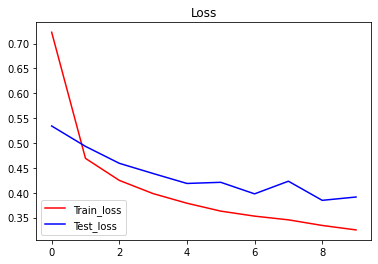

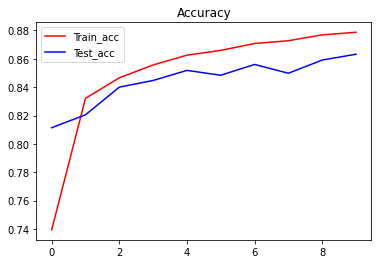

In [ ]:
t = np.arange(0, n_epochs , 1)
l1, l2, a1, a2 = losses, test_losses, acc, test_accs
plt.plot(t, l1, 'r', t, l2, 'b')
plt.title('Loss')
plt.legend(['Train_loss','Test_loss'], loc=3)
plt.show()

plt.plot(t, a1, 'r', t, a2, 'b')
plt.title('Accuracy')
plt.legend(['Train_acc','Test_acc'], loc=2)
plt.show()

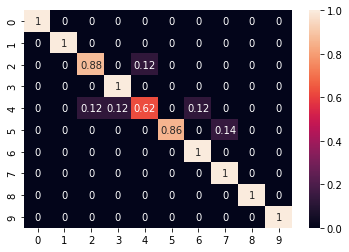

In [ ]:
sns.heatmap(confusion_matrix(y_pred.argmax(dim=1), y_batch, normalize='true'), annot=True)

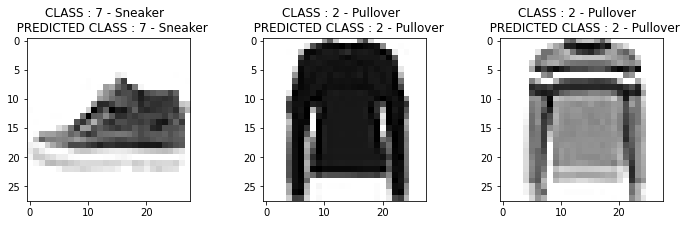

In [ ]:
np.random.seed(777)
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
j = 0
for i in np.random.randint(0, fmnist_test.targets.shape[0], 3):
    id_class = fmnist_test.targets[i]
    class_name = fmnist_test.classes[id_class]

    id_pred = model(fmnist_test.data[i:i + 1].float()).argmax(dim=1).item()
    class_name_predicted = fmnist_test.classes[id_pred]
    
    axs[j].imshow(fmnist_test.data[i], cmap='binary')
    axs[j].set_title(f'CLASS : {id_class} - {class_name}  \n  PREDICTED CLASS : {id_pred} - {class_name_predicted}') 
    j += 1

plt.show()

### 1.2 Решить задачу 1.1, используя сверточную нейронную сеть. 
* Добиться значения accuracy на тестовом множестве не менее 90%
* Визуализировать результаты работы первого сверточного слоя

In [ ]:
fmnist = datasets.FashionMNIST('./data/fmnist', train=True, download=True,
                               transform=transforms.ToTensor())
fmnist_test = datasets.FashionMNIST('./data/fmnist', train=False, download=True,
                                   transform=transforms.ToTensor())
print(len(fmnist), len(fmnist_test))

60000 10000


In [ ]:
model = torch.nn.Sequential(torch.nn.Conv2d(1, 8, (3, 3), padding = 1),
                            #torch.nn.AvgPool2d((2,2)),
                            torch.nn.ReLU(),
                            torch.nn.Conv2d(8, 16, (3, 3), padding = 1),
                            torch.nn.AvgPool2d((2,2)),
                            torch.nn.ReLU(),                            
                            torch.nn.Flatten(),
                            torch.nn.Linear(3136, 64),
                            torch.nn.ReLU(),
                            torch.nn.Linear(64, len(fmnist.classes)))

In [ ]:
def test_accuracy(_model, test_loader, loss_func):
    acc = 0
    loss_ = 0
    with torch.no_grad():
        for j, (x, y) in enumerate(test_loader, 1):
            pred = model(x)
            acc += torch.sum(torch.eq(pred.argmax(dim=1), y))
            loss_ += loss_func(pred, y)

    return acc / test_loader.dataset.data.shape[0], loss_ / j

In [ ]:
train_dataloader = DataLoader(fmnist, batch_size=256, shuffle=True)
test_dataloader = DataLoader(fmnist_test, batch_size=256)
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.NAdam(model.parameters(), lr=.001)
n_epochs = 10
losses, acc, test_accs, test_losses = [], [], [], []


for epoch in tqdm(range(n_epochs)):
    epoch_acc = 0
    epoch_loss = 0
    for i, (X_batch, y_batch) in enumerate(train_dataloader, 1):
        y_pred = model(X_batch)
        curr_loss = loss(y_pred, y_batch)
        curr_loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        epoch_loss += curr_loss.item()
        curr_acc = torch.sum(torch.eq(y_pred.argmax(dim=1), y_batch))
        epoch_acc += curr_acc.item()

    test_acc, test_loss = test_accuracy(model, test_dataloader, loss)
    print(f'EPOCH: {epoch + 1 :3d}  |  LOSS: {epoch_loss / i: 0.4f}  |  TEST LOSS: {test_loss:0.4f}  |  ACCURACY: {epoch_acc / train_dataloader.dataset.data.shape[0]: 0.4f}  |  TEST ACCURACY: {test_acc:0.4f}')

    test_accs.append(test_acc)
    test_losses.append(test_loss)
    acc.append(epoch_acc / train_dataloader.dataset.data.shape[0])
    losses.append(epoch_loss / len(train_dataloader))

  0%|          | 0/10 [00:00<?, ?it/s]

EPOCH:   1  |  LOSS:  0.2434  |  TEST LOSS: 0.2819  |  ACCURACY:  0.9099  |  TEST ACCURACY: 0.8990
EPOCH:   2  |  LOSS:  0.2312  |  TEST LOSS: 0.2823  |  ACCURACY:  0.9136  |  TEST ACCURACY: 0.9003
EPOCH:   3  |  LOSS:  0.2237  |  TEST LOSS: 0.2888  |  ACCURACY:  0.9173  |  TEST ACCURACY: 0.8956
EPOCH:   4  |  LOSS:  0.2158  |  TEST LOSS: 0.3500  |  ACCURACY:  0.9205  |  TEST ACCURACY: 0.8756
EPOCH:   5  |  LOSS:  0.2079  |  TEST LOSS: 0.2775  |  ACCURACY:  0.9237  |  TEST ACCURACY: 0.9031
EPOCH:   6  |  LOSS:  0.2002  |  TEST LOSS: 0.3084  |  ACCURACY:  0.9262  |  TEST ACCURACY: 0.8918
EPOCH:   7  |  LOSS:  0.1930  |  TEST LOSS: 0.2771  |  ACCURACY:  0.9280  |  TEST ACCURACY: 0.9032
EPOCH:   8  |  LOSS:  0.1873  |  TEST LOSS: 0.2795  |  ACCURACY:  0.9303  |  TEST ACCURACY: 0.9034
EPOCH:   9  |  LOSS:  0.1805  |  TEST LOSS: 0.2755  |  ACCURACY:  0.9332  |  TEST ACCURACY: 0.9076
EPOCH:  10  |  LOSS:  0.1734  |  TEST LOSS: 0.2739  |  ACCURACY:  0.9361  |  TEST ACCURACY: 0.9087


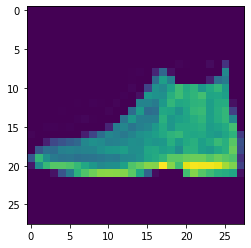

In [ ]:
pic, target = next(iter(DataLoader(fmnist_test, batch_size=1)))
fst_pic = model[:0](pic)[0]
plt.imshow(fst_pic[0].detach().numpy())

##  2. Классификация изображений (датасет CIFAR 10) 


### 2.1 Решить задачу классификации, не используя сверточные слои. 

* Нормализовать данные (если необходимо)
* Предложить архитектуру модели для решения задачи
* Посчитать количество параметров модели.
* Обучить модель
* Вывести график функции потерь по эпохам. 
* Используя тестовое множество

  * Продемонстрировать работу модели: вывести несколько изображений, указать над ними правильный класс и класс, предсказанный моделью. 

  * Вывести матрицу ошибок.

  * Вывести значение accuracy на тестовом множестве.
* Сохранить модель

In [ ]:
cifar = datasets.cifar.CIFAR10('./data/cifar', train=True, download=True,
                               transform=transforms.ToTensor())
cifar_test = datasets.cifar.CIFAR10('./data/cifar', train=False, download=True,
                               transform=transforms.ToTensor())
print(len(cifar), len(cifar_test))

Files already downloaded and verified
Files already downloaded and verified
50000 10000


In [ ]:
model = torch.nn.Sequential(torch.nn.Flatten(),
                            torch.nn.Linear(3*32*32, 128),
                            torch.nn.ReLU(),
                            torch.nn.Linear(128, 64),
                            torch.nn.ReLU(),
                            torch.nn.Linear(64, len(cifar.classes)))

In [ ]:
def test_accuracy(_model, test_loader, loss_func):
    acc = 0
    loss_ = 0
    with torch.no_grad():
        for j, (x, y) in enumerate(test_loader, 1):
            pred = model(x)
            acc += torch.sum(torch.eq(pred.argmax(dim=1), y))
            loss_ += loss_func(pred, y)

    return acc / test_loader.dataset.data.shape[0], loss_ / j

In [ ]:
train_dataloader = DataLoader(cifar, batch_size=128, shuffle=True)
test_dataloader = DataLoader(cifar_test, batch_size=5000)
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.NAdam(model.parameters(), lr=.001)
n_epochs = 10
losses, acc, test_accs, test_losses = [], [], [], []


for epoch in tqdm(range(n_epochs)):
    epoch_acc = 0
    epoch_loss = 0
    for i, (X_batch, y_batch) in enumerate(train_dataloader, 1):
        y_pred = model(X_batch)
        curr_loss = loss(y_pred, y_batch)
        curr_loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        epoch_loss += curr_loss.item()
        curr_acc = torch.sum(torch.eq(y_pred.argmax(dim=1), y_batch))
        epoch_acc += curr_acc.item()

    test_acc, test_loss = test_accuracy(model, test_dataloader, loss)
    print(f'EPOCH: {epoch + 1 :3d}  |  LOSS: {epoch_loss / i: 0.4f}  |  TEST LOSS: {test_loss:0.4f}  |  ACCURACY: {epoch_acc / train_dataloader.dataset.data.shape[0]: 0.4f}  |  TEST ACCURACY: {test_acc:0.4f}')

    test_accs.append(test_acc)
    test_losses.append(test_loss)
    acc.append(epoch_acc / train_dataloader.dataset.data.shape[0])
    losses.append(epoch_loss / len(train_dataloader))

  0%|          | 0/10 [00:00<?, ?it/s]

EPOCH:   1  |  LOSS:  1.9121  |  TEST LOSS: 1.7719  |  ACCURACY:  0.3095  |  TEST ACCURACY: 0.3671
EPOCH:   2  |  LOSS:  1.7068  |  TEST LOSS: 1.6420  |  ACCURACY:  0.3865  |  TEST ACCURACY: 0.4148
EPOCH:   3  |  LOSS:  1.6406  |  TEST LOSS: 1.6192  |  ACCURACY:  0.4131  |  TEST ACCURACY: 0.4246
EPOCH:   4  |  LOSS:  1.5932  |  TEST LOSS: 1.6370  |  ACCURACY:  0.4296  |  TEST ACCURACY: 0.4113
EPOCH:   5  |  LOSS:  1.5549  |  TEST LOSS: 1.5982  |  ACCURACY:  0.4470  |  TEST ACCURACY: 0.4334
EPOCH:   6  |  LOSS:  1.5211  |  TEST LOSS: 1.5105  |  ACCURACY:  0.4574  |  TEST ACCURACY: 0.4682
EPOCH:   7  |  LOSS:  1.4936  |  TEST LOSS: 1.5863  |  ACCURACY:  0.4691  |  TEST ACCURACY: 0.4519
EPOCH:   8  |  LOSS:  1.4674  |  TEST LOSS: 1.4922  |  ACCURACY:  0.4787  |  TEST ACCURACY: 0.4707
EPOCH:   9  |  LOSS:  1.4480  |  TEST LOSS: 1.4914  |  ACCURACY:  0.4875  |  TEST ACCURACY: 0.4717
EPOCH:  10  |  LOSS:  1.4326  |  TEST LOSS: 1.4768  |  ACCURACY:  0.4913  |  TEST ACCURACY: 0.4716


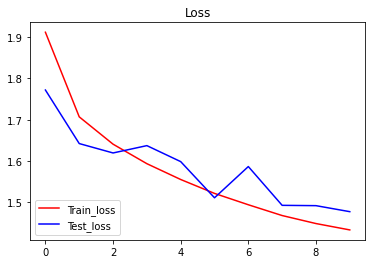

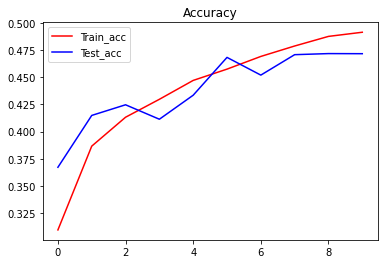

In [ ]:
t = np.arange(0, n_epochs , 1)
l1, l2, a1, a2 = losses, test_losses, acc, test_accs
plt.plot(t, l1, 'r', t, l2, 'b')
plt.title('Loss')
plt.legend(['Train_loss','Test_loss'], loc=3)
plt.show()

plt.plot(t, a1, 'r', t, a2, 'b')
plt.title('Accuracy')
plt.legend(['Train_acc','Test_acc'], loc=2)
plt.show()

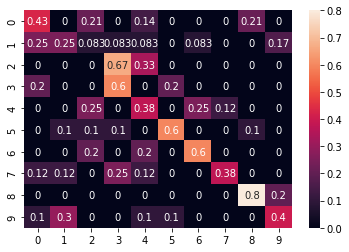

In [ ]:
sns.heatmap(confusion_matrix(y_pred.argmax(dim=1), y_batch, normalize='true'), annot=True)

In [ ]:
cifar_test.targets = torch.tensor(cifar_test.targets)
cifar_test.data = torch.tensor(cifar_test.data)

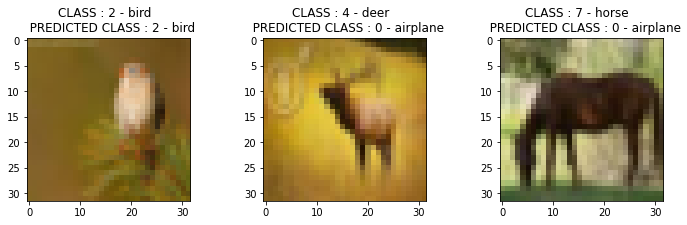

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
j = 0
for i in np.random.randint(0, cifar_test.targets.shape[0], 3):
    id_class = cifar_test.targets[i]
    class_name = cifar_test.classes[id_class]

    id_pred = model(cifar_test.data[i:i + 1].float()).argmax(dim=1).item()
    class_name_predicted = cifar_test.classes[id_pred]
    
    axs[j].imshow(cifar_test.data[i], cmap='binary')
    axs[j].set_title(f'CLASS : {id_class} - {class_name}  \n  PREDICTED CLASS : {id_pred} - {class_name_predicted}') 
    j += 1

plt.show()

### 2.2 Решить задачу 2.1, используя сверточную нейронную сеть. 
* Добиться значения accuracy на тестовом множестве не менее 70%.
* Визуализировать результаты работы первого сверточного слоя

In [ ]:
cifar = datasets.cifar.CIFAR10('./data/cifar', train=True, download=True,
                               transform=transforms.ToTensor())
cifar_test = datasets.cifar.CIFAR10('./data/cifar', train=False, download=True,
                               transform=transforms.ToTensor())
print(len(cifar), len(cifar_test))

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar/cifar-10-python.tar.gz to ./data/cifar
Files already downloaded and verified
50000 10000


In [ ]:
model = torch.nn.Sequential(torch.nn.Conv2d(3, 16, kernel_size=3, padding=1),
                            torch.nn.MaxPool2d(2),
                            torch.nn.Conv2d(16, 32, kernel_size=3, padding=1),
                            torch.nn.MaxPool2d(2),
                            torch.nn.Conv2d(32, 64, kernel_size=3, padding=1),
                            torch.nn.MaxPool2d(2),
                            torch.nn.ReLU(),
                            torch.nn.Flatten(),
                            torch.nn.Linear(1024, 512),
                            torch.nn.ReLU(),
                            torch.nn.Linear(512, 128),
                            torch.nn.ReLU(),
                            torch.nn.Linear(128, len(cifar.classes)))

In [ ]:
def test_accuracy(_model, test_loader, loss_func):
    acc = 0
    loss_ = 0
    with torch.no_grad():
        for j, (x, y) in enumerate(test_loader, 1):
            pred = model(x)
            acc += torch.sum(torch.eq(pred.argmax(dim=1), y))
            loss_ += loss_func(pred, y)

    return acc / test_loader.dataset.data.shape[0], loss_ / j

In [ ]:
train_dataloader = DataLoader(cifar, batch_size=128, shuffle=True)
test_dataloader = DataLoader(cifar_test, batch_size=128)
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.NAdam(model.parameters(), lr=.001)
n_epochs = 10
losses, acc, test_accs, test_losses = [], [], [], []


for epoch in tqdm(range(n_epochs)):
    epoch_acc = 0
    epoch_loss = 0
    for i, (X_batch, y_batch) in enumerate(train_dataloader, 1):
        y_pred = model(X_batch)
        curr_loss = loss(y_pred, y_batch)
        curr_loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        epoch_loss += curr_loss.item()
        curr_acc = torch.sum(torch.eq(y_pred.argmax(dim=1), y_batch))
        epoch_acc += curr_acc.item()

    test_acc, test_loss = test_accuracy(model, test_dataloader, loss)
    print(f'EPOCH: {epoch + 1 :3d}  |  LOSS: {epoch_loss / i: 0.4f}  |  TEST LOSS: {test_loss:0.4f}  |  ACCURACY: {epoch_acc / train_dataloader.dataset.data.shape[0]: 0.4f}  |  TEST ACCURACY: {test_acc:0.4f}')

    test_accs.append(test_acc)
    test_losses.append(test_loss)
    acc.append(epoch_acc / train_dataloader.dataset.data.shape[0])
    losses.append(epoch_loss / len(train_dataloader))

  0%|          | 0/10 [00:00<?, ?it/s]

EPOCH:   1  |  LOSS:  1.3913  |  TEST LOSS: 1.1939  |  ACCURACY:  0.4976  |  TEST ACCURACY: 0.5735
EPOCH:   2  |  LOSS:  0.9796  |  TEST LOSS: 0.9413  |  ACCURACY:  0.6516  |  TEST ACCURACY: 0.6650
EPOCH:   3  |  LOSS:  0.7865  |  TEST LOSS: 0.8941  |  ACCURACY:  0.7237  |  TEST ACCURACY: 0.6928
EPOCH:   4  |  LOSS:  0.6503  |  TEST LOSS: 0.8168  |  ACCURACY:  0.7734  |  TEST ACCURACY: 0.7250
EPOCH:   5  |  LOSS:  0.5374  |  TEST LOSS: 0.7873  |  ACCURACY:  0.8113  |  TEST ACCURACY: 0.7381
EPOCH:   6  |  LOSS:  0.4332  |  TEST LOSS: 0.7898  |  ACCURACY:  0.8473  |  TEST ACCURACY: 0.7441
EPOCH:   7  |  LOSS:  0.3435  |  TEST LOSS: 0.8637  |  ACCURACY:  0.8795  |  TEST ACCURACY: 0.7405
EPOCH:   8  |  LOSS:  0.2629  |  TEST LOSS: 0.9998  |  ACCURACY:  0.9070  |  TEST ACCURACY: 0.7304
EPOCH:   9  |  LOSS:  0.1960  |  TEST LOSS: 1.0263  |  ACCURACY:  0.9321  |  TEST ACCURACY: 0.7390
EPOCH:  10  |  LOSS:  0.1565  |  TEST LOSS: 1.1459  |  ACCURACY:  0.9451  |  TEST ACCURACY: 0.7328


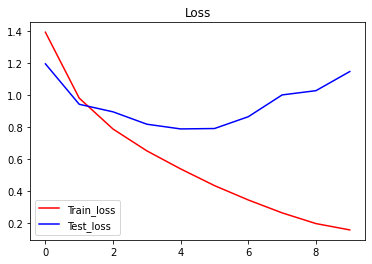

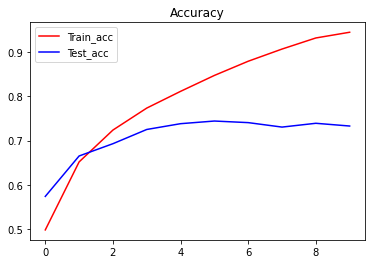

In [ ]:
t = np.arange(0, n_epochs , 1)
l1, l2, a1, a2 = losses, test_losses, acc, test_accs
plt.plot(t, l1, 'r', t, l2, 'b')
plt.title('Loss')
plt.legend(['Train_loss','Test_loss'], loc=3)
plt.show()

plt.plot(t, a1, 'r', t, a2, 'b')
plt.title('Accuracy')
plt.legend(['Train_acc','Test_acc'], loc=2)
plt.show()

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
j = 0
for i in np.random.randint(0, cifar_test.targets.shape[0], 3):
    id_class = cifar_test.targets[i]
    class_name = cifar_test.classes[id_class]

    id_pred = model(cifar_test.data[i:i + 1].float()).argmax(dim=1).item()
    class_name_predicted = cifar_test.classes[id_pred]
    
    axs[j].imshow(cifar_test.data[i], cmap='binary')
    axs[j].set_title(f'CLASS : {id_class} - {class_name}  \n  PREDICTED CLASS : {id_pred} - {class_name_predicted}') 
    j += 1

plt.show()

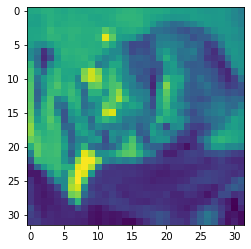

In [ ]:
pic, target = next(iter(DataLoader(cifar_test, batch_size=1)))
fst_pic = model[:0](pic)[0]
fst_pic
plt.imshow(fst_pic[0].detach().numpy())

## 3. Загрузка изображений из внешних источников

### 3.1 Решить задачу классификации обезьян (датасет [monkey.zip](https://disk.yandex.ru/d/OxYgY4S7aR6ulQ)).
* Загрузить архив с данными на диск
* Создать датасет на основе файлов при помощи `torchvision.datasets.ImageFolder`
* Преобразовать изображения к тензорами одного размера (например, 400х400). Потестировать другие преобразования из `torchvision.transforms`
* Предложить архитектуру модели для решения задачи. Обучить модель.
* Используя тестовое множество

  * Продемонстрировать работу модели: вывести несколько изображений, указать над ними правильный класс и класс, предсказанный моделью. 

  * Вывести матрицу ошибок.

  * Вывести значение accuracy на тестовом множестве.
  * Добиться значения accuracy на тестовом множестве не менее 60%

In [ ]:
import zipfile
import torchvision

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
zf = zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/Тадимо2/Data/monkeys.zip')
for file in tqdm(zf.infolist()):
    zf.extract(file)

  0%|          | 0/1371 [00:00<?, ?it/s]

In [ ]:
transform = torchvision.transforms.Compose([
                            torchvision.transforms.ToTensor(),
                            torchvision.transforms.Resize((512, 512))])

In [ ]:
train_dataset = torchvision.datasets.ImageFolder('training/training', transform=transform)
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = torchvision.datasets.ImageFolder('validation/validation', transform=transform)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=True)

In [ ]:
p = 0.25
model = torch.nn.Sequential(
    
    torch.nn.BatchNorm2d(3),
    torch.nn.Conv2d(3, 16, (3, 3), stride=2),
    torch.nn.MaxPool2d((2, 2)),
    torch.nn.ReLU(),

    torch.nn.BatchNorm2d(16),
    torch.nn.Conv2d(16, 128, (3, 3), stride=2),
    torch.nn.MaxPool2d((2, 2)),
    torch.nn.ReLU(),

    torch.nn.BatchNorm2d(128),
    torch.nn.Conv2d(128, 128, (3, 3), stride=2),
    torch.nn.MaxPool2d((2, 2)),
    torch.nn.ReLU(),

    torch.nn.Flatten(),
    torch.nn.Linear(6272, 128),
    torch.nn.Dropout(p),
    torch.nn.ReLU(),
    torch.nn.Linear(128, 10)
)

In [ ]:
model.to(torch.device(0))

Sequential(
  (0): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (1): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2))
  (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (3): ReLU()
  (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): Conv2d(16, 128, kernel_size=(3, 3), stride=(2, 2))
  (6): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (7): ReLU()
  (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (9): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2))
  (10): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (11): ReLU()
  (12): Flatten(start_dim=1, end_dim=-1)
  (13): Linear(in_features=6272, out_features=128, bias=True)
  (14): Dropout(p=0.25, inplace=False)
  (15): ReLU()
  (16): Linear(in_features=128, out_features=10, bias=True)
)

In [ ]:
def test_accuracy(_model, test_loader, loss_func):
    acc = 0
    loss_ = 0
    n = 0
    with torch.no_grad():
        for j, (x, y) in enumerate(test_loader, 1):
            x = x.to(torch.device(0))
            y = y.to(torch.device(0))
            pred = _model(x)
            acc += torch.sum(torch.eq(pred.cpu().argmax(dim=1), y.cpu()))
            loss_ += loss_func(pred.cpu(), y.cpu())
            n += pred.shape[0]

    return acc / n, loss_ / j

In [ ]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.NAdam(model.parameters(), lr=.001)
n_epochs = 10
losses, acc, test_accs, test_losses = [], [], [], []


for epoch in tqdm(range(n_epochs)):
    epoch_acc = 0
    epoch_loss = 0
    k = 0
    model.train()
    for i, (X_batch, y_batch) in enumerate(train_dataloader, 1):
        X_batch = X_batch.to(torch.device(0))
        y_batch = y_batch.to(torch.device(0))
        y_pred = model(X_batch)
        curr_loss = loss(y_pred, y_batch)
        curr_loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        epoch_loss += curr_loss.item()
        curr_acc = torch.sum(torch.eq(y_pred.cpu().argmax(dim=1), y_batch.cpu()))
        epoch_acc += curr_acc.cpu().item()
        k += y_pred.shape[0]

    model.eval()
    test_acc, test_loss = test_accuracy(model, test_dataloader, loss)
    print(f'EPOCH: {epoch + 1 :3d}  |  LOSS: {epoch_loss / i: 0.4f}  |  TEST LOSS: {test_loss:0.4f}  |  ACCURACY: {epoch_acc / k: 0.4f}  |  TEST ACCURACY: {test_acc:0.4f}')

    test_accs.append(test_acc)
    test_losses.append(test_loss)
    acc.append(epoch_acc / k)
    losses.append(epoch_loss / len(train_dataloader))

  0%|          | 0/10 [00:00<?, ?it/s]

EPOCH:   1  |  LOSS:  2.0911  |  TEST LOSS: 1.9572  |  ACCURACY:  0.2571  |  TEST ACCURACY: 0.3713
EPOCH:   2  |  LOSS:  1.4651  |  TEST LOSS: 1.4900  |  ACCURACY:  0.4758  |  TEST ACCURACY: 0.4596
EPOCH:   3  |  LOSS:  1.2477  |  TEST LOSS: 1.5915  |  ACCURACY:  0.5552  |  TEST ACCURACY: 0.5294
EPOCH:   4  |  LOSS:  1.0516  |  TEST LOSS: 1.2529  |  ACCURACY:  0.6408  |  TEST ACCURACY: 0.6066
EPOCH:   5  |  LOSS:  0.8758  |  TEST LOSS: 1.2841  |  ACCURACY:  0.6974  |  TEST ACCURACY: 0.5478
EPOCH:   6  |  LOSS:  0.7647  |  TEST LOSS: 1.1331  |  ACCURACY:  0.7247  |  TEST ACCURACY: 0.6434
EPOCH:   7  |  LOSS:  0.6560  |  TEST LOSS: 0.9667  |  ACCURACY:  0.7694  |  TEST ACCURACY: 0.6875
EPOCH:   8  |  LOSS:  0.5626  |  TEST LOSS: 1.2391  |  ACCURACY:  0.7940  |  TEST ACCURACY: 0.5772
EPOCH:   9  |  LOSS:  0.5210  |  TEST LOSS: 1.0306  |  ACCURACY:  0.8168  |  TEST ACCURACY: 0.6691
EPOCH:  10  |  LOSS:  0.4732  |  TEST LOSS: 1.1009  |  ACCURACY:  0.8368  |  TEST ACCURACY: 0.6654


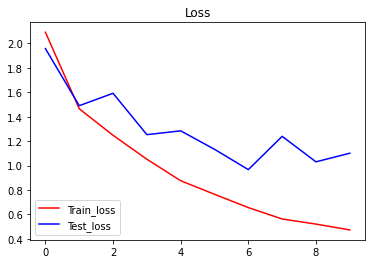

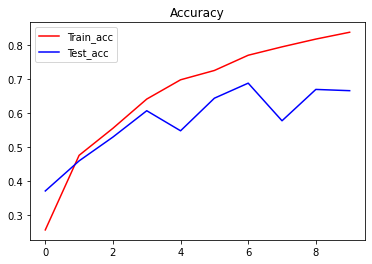

In [ ]:
t = np.arange(0, n_epochs , 1)
l1, l2, a1, a2 = losses, test_losses, acc, test_accs
plt.plot(t, l1, 'r', t, l2, 'b')
plt.title('Loss')
plt.legend(['Train_loss','Test_loss'], loc=3)
plt.show()

plt.plot(t, a1, 'r', t, a2, 'b')
plt.title('Accuracy')
plt.legend(['Train_acc','Test_acc'], loc=2)
plt.show()

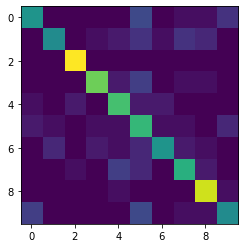

In [ ]:
model.eval()
model.to('cpu')
right_ans = torch.zeros(len(test_dataset.targets)).to('cpu')
with torch.no_grad():
    i = 0
    for x, _ in DataLoader(test_dataset, batch_size=2000):
        x = x.to('cpu')
        right_ans[i:i + x.shape[0]] += model(x).argmax(dim=1)
        i += x.shape[0]

cm = confusion_matrix(test_dataset.targets, right_ans.long().numpy())
plt.imshow(cm)

In [ ]:
monkey_names = pd.read_csv('/content/monkey_labels.txt', sep=',', index_col='Label')

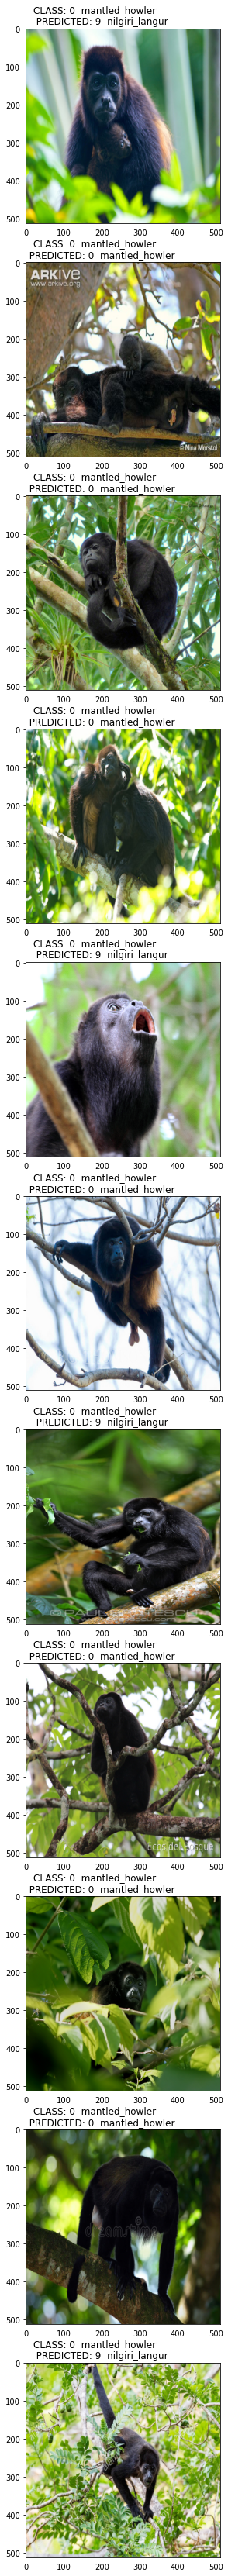

In [ ]:
np.random.seed(21)
fig, axs = plt.subplots(11, 1, figsize=(60, 60))
model.eval()
i = 10
j = 0

for image, name in DataLoader(test_dataset):
    image = image.to(torch.device(0))
    name = name.to(torch.device(0))
    class_name = monkey_names.iloc[int(name), 1]
    id_predicted = model(image).argmax(axis=1).item()
    class_name_predicted = monkey_names.iloc[int(id_predicted), 1]
    image = image.reshape(3, 512, 512).permute(1, 2, 0)
    
    axs[j].imshow(image.cpu().data.numpy(), cmap='binary')
    axs[j].set_title(f'CLASS: {name.item()} {class_name}   \n  PREDICTED: {id_predicted} {class_name_predicted}', loc = 'center') 
    j += 1

    if i == 0:
        break
    i -= 1

### 3.2 Решить задачу классификации собак и кошек (датасет [cats_dogs.zip](https://disk.yandex.ru/d/wQtt5O1JF9ctnA)).
* Загрузить архив с данными на диск
* Создать датасет на основе файлов при помощи `torchvision.datasets.ImageFolder`
* Преобразовать изображения к тензорами одного размера (например, 400х400). Потестировать другие преобразования из `torchvision.transforms`
* Предложить архитектуру модели для решения задачи. Обучить модель.
* Используя тестовое множество

  * Продемонстрировать работу модели: вывести несколько изображений, указать над ними правильный класс и класс, предсказанный моделью. 

  * Вывести матрицу ошибок.

  * Вывести значение accuracy на тестовом множестве.
  * Добиться значения accuracy на тестовом множестве не менее 80%

In [ ]:
zf = zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/Тадимо2/Data/cats_dogs.zip')
for file in tqdm(zf.infolist()):
    zf.extract(file)

  0%|          | 0/25004 [00:00<?, ?it/s]

In [ ]:
transform = torchvision.transforms.Compose([
                            torchvision.transforms.ToTensor(),
                            torchvision.transforms.Resize((512, 512))])
dataset = torchvision.datasets.ImageFolder('cats_dogs/train', transform=transform)
print(len(dataset))

25000


In [ ]:
test_len = int(len(dataset) * 0.25)
train_len = len(dataset) - test_len
train_dataset, val_dataset = torch.utils.data.random_split(dataset, lengths=(train_len, test_len))
print(len(train_dataset), len(val_dataset))

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=512, shuffle=True)

18750 6250


In [ ]:
model = torch.nn.Sequential(
    
    torch.nn.BatchNorm2d(3),
    torch.nn.Conv2d(3, 8, (4, 4), stride=3),
    torch.nn.MaxPool2d((4, 4)),
    torch.nn.CELU(),

    torch.nn.BatchNorm2d(8),
    torch.nn.Conv2d(8, 128, (4, 4), stride=3),
    torch.nn.MaxPool2d((5, 5)),
    torch.nn.CELU(),

    torch.nn.Flatten(),
    torch.nn.Linear(512, 128),
    torch.nn.CELU(),
    torch.nn.Linear(128, 10)
)

In [ ]:
model.to(torch.device(0))

Sequential(
  (0): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (1): Conv2d(3, 8, kernel_size=(4, 4), stride=(3, 3))
  (2): MaxPool2d(kernel_size=(4, 4), stride=(4, 4), padding=0, dilation=1, ceil_mode=False)
  (3): CELU(alpha=1.0)
  (4): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): Conv2d(8, 128, kernel_size=(4, 4), stride=(3, 3))
  (6): MaxPool2d(kernel_size=(5, 5), stride=(5, 5), padding=0, dilation=1, ceil_mode=False)
  (7): CELU(alpha=1.0)
  (8): Flatten(start_dim=1, end_dim=-1)
  (9): Linear(in_features=512, out_features=128, bias=True)
  (10): CELU(alpha=1.0)
  (11): Linear(in_features=128, out_features=10, bias=True)
)

In [ ]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.NAdam(model.parameters(), lr=.001)
n_epochs = 10
losses, acc, test_accs, test_losses = [], [], [], []


for epoch in tqdm(range(n_epochs)):
    epoch_acc = 0
    epoch_loss = 0
    k = 0
    model.train()
    for i, (X_batch, y_batch) in enumerate(train_dataloader, 1):
        X_batch = X_batch.to(torch.device(0))
        y_batch = y_batch.to(torch.device(0))
        y_pred = model(X_batch)
        curr_loss = loss(y_pred, y_batch)
        curr_loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        epoch_loss += curr_loss.item()
        curr_acc = torch.sum(torch.eq(y_pred.cpu().argmax(dim=1), y_batch.cpu()))
        epoch_acc += curr_acc.cpu().item()
        k += y_pred.shape[0]

    model.eval()
    test_acc, test_loss = test_accuracy(model, test_dataloader, loss)
    print(f'EPOCH: {epoch + 1 :3d}  |  LOSS: {epoch_loss / i: 0.4f}  |  TEST LOSS: {test_loss:0.4f}  |  ACCURACY: {epoch_acc / k: 0.4f}  |  TEST ACCURACY: {test_acc:0.4f}')

    test_accs.append(test_acc)
    test_losses.append(test_loss)
    acc.append(epoch_acc / k)
    losses.append(epoch_loss / len(train_dataloader))

  0%|          | 0/10 [00:00<?, ?it/s]

EPOCH:   1  |  LOSS:  0.6690  |  TEST LOSS: 0.5553  |  ACCURACY:  0.6240  |  TEST ACCURACY: 0.7357
EPOCH:   2  |  LOSS:  0.5535  |  TEST LOSS: 0.5944  |  ACCURACY:  0.7222  |  TEST ACCURACY: 0.6898
EPOCH:   3  |  LOSS:  0.4990  |  TEST LOSS: 0.4785  |  ACCURACY:  0.7593  |  TEST ACCURACY: 0.7758
EPOCH:   4  |  LOSS:  0.4716  |  TEST LOSS: 0.4675  |  ACCURACY:  0.7746  |  TEST ACCURACY: 0.7805
EPOCH:   5  |  LOSS:  0.4499  |  TEST LOSS: 0.4570  |  ACCURACY:  0.7886  |  TEST ACCURACY: 0.7747
EPOCH:   6  |  LOSS:  0.4264  |  TEST LOSS: 0.5768  |  ACCURACY:  0.8011  |  TEST ACCURACY: 0.7234
EPOCH:   7  |  LOSS:  0.3996  |  TEST LOSS: 0.4909  |  ACCURACY:  0.8169  |  TEST ACCURACY: 0.7678
EPOCH:   8  |  LOSS:  0.3857  |  TEST LOSS: 0.5956  |  ACCURACY:  0.8267  |  TEST ACCURACY: 0.7253
EPOCH:   9  |  LOSS:  0.3627  |  TEST LOSS: 0.4218  |  ACCURACY:  0.8383  |  TEST ACCURACY: 0.8022
EPOCH:  10  |  LOSS:  0.3498  |  TEST LOSS: 0.4233  |  ACCURACY:  0.8444  |  TEST ACCURACY: 0.8098


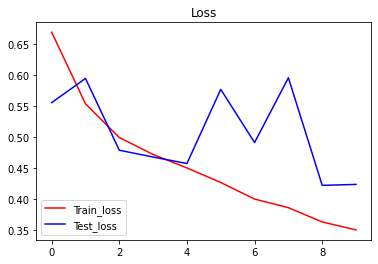

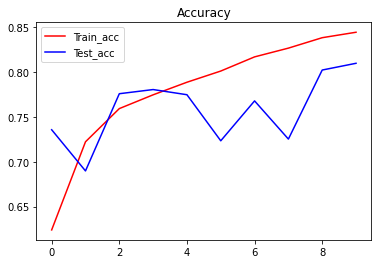

In [ ]:
t = np.arange(0, n_epochs , 1)
l1, l2, a1, a2 = losses, test_losses, acc, test_accs
plt.plot(t, l1, 'r', t, l2, 'b')
plt.title('Loss')
plt.legend(['Train_loss','Test_loss'], loc=3)
plt.show()

plt.plot(t, a1, 'r', t, a2, 'b')
plt.title('Accuracy')
plt.legend(['Train_acc','Test_acc'], loc=2)
plt.show()

In [ ]:
catdog_names = pd.read_csv('/content/monkey_labels.txt', sep=',', index_col='Label')

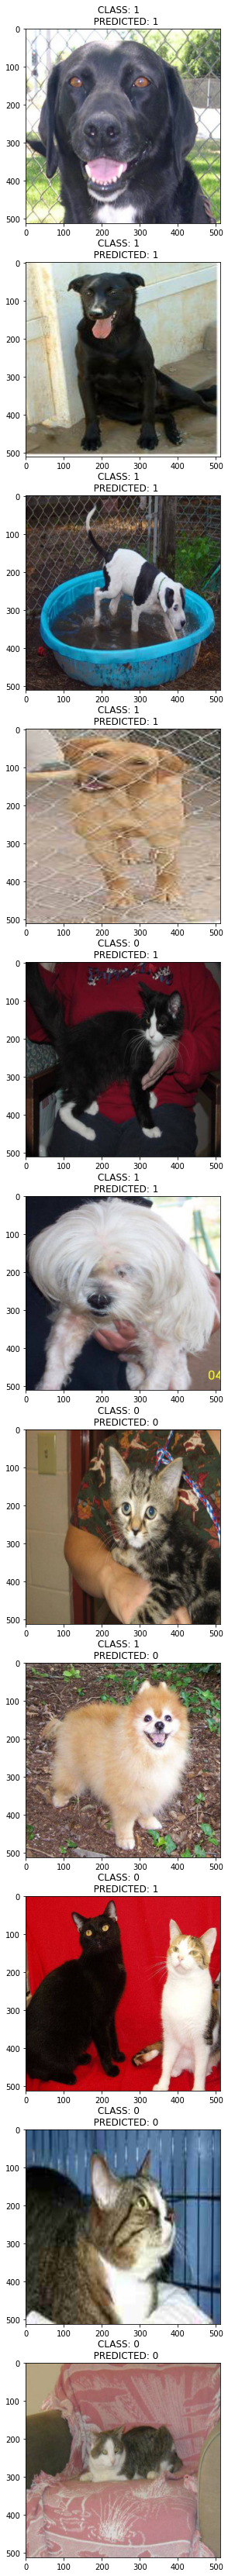

In [ ]:
np.random.seed(21)
fig, axs = plt.subplots(11, 1, figsize=(60, 60))
model.eval()
model.to(torch.device(0))
i = 10
j = 0

for image, name in DataLoader(val_dataset):
    image = image.to(torch.device(0))
    name = name.to(torch.device(0))
    id_predicted = model(image).argmax(axis=1).item()
    image = image.reshape(3, 512, 512).permute(1, 2, 0)
    
    axs[j].imshow(image.cpu().data.numpy(), cmap='binary')
    axs[j].set_title(f'CLASS: {name.item()}   \n  PREDICTED: {id_predicted}', loc = 'center') 
    j += 1

    if i == 0:
        break
    i -= 1

# 4. Transfer Learning

### 4.1 Решить задачу 3.1, воспользовавшись предобученной моделью VGG16
* Загрузить данные для обучения
* Преобразования: размер 224x224, нормализация с параметрами `mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)`
* Заменить последний полносвязный слой модели в соответствии с задачей
* Дообучить модель (не замораживать веса). Вычислить значение accuracy на тестовом множестве
* Дообучить модель (заморозить все веса, кроме последнего блока слоев (`classifier`)). 
* Вычислить значение accuracy на тестовом множестве.


In [ ]:
from torchvision.models import vgg16

mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)
vgg16_model = vgg16(True)

In [ ]:
from torchvision.datasets import ImageFolder

train_dataset = ImageFolder(
    './training/training',
    transform=transforms.Compose(
        [
            transforms.ToTensor(),
            transforms.Resize((224, 224)),
            transforms.Normalize(mean, std)
        ]
    )
)

test_dataset = ImageFolder(
    './validation/validation',
    transform=transforms.Compose(
        [
            transforms.ToTensor(),
            transforms.Resize((224, 224)),
            transforms.Normalize(mean, std)
        ]
    )
)

In [ ]:
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=16, shuffle=True)

In [ ]:
vgg16_model.classifier.add_module('linear', torch.nn.Linear(1000, 10))

In [ ]:
vgg16_model.to(torch.device(0))

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
def test_accuracy(_model, test_loader, loss_func):
    acc = 0
    loss_ = 0
    n = 0
    with torch.no_grad():
        for j, (x, y) in enumerate(test_loader, 1):
            x = x.to(torch.device(0))
            y = y.to(torch.device(0))
            pred = _model(x)
            acc += torch.sum(torch.eq(pred.argmax(dim=1), y))
            loss_ += loss_func(pred, y)
            n += pred.shape[0]

    return acc / n, loss_ / j

In [ ]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.NAdam(vgg16_model.parameters(), lr=.001)
n_epochs = 3
losses, acc, test_accs, test_losses = [], [], [], []


for epoch in tqdm(range(n_epochs)):
    epoch_acc = 0
    epoch_loss = 0
    k = 0
    model.train()
    for i, (X_batch, y_batch) in enumerate(train_dataloader, 1):
        X_batch = X_batch.to(torch.device(0)) 
        y_batch = y_batch.to(torch.device(0))
        y_pred = vgg16_model(X_batch)
        curr_loss = loss(y_pred, y_batch)
        curr_loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        epoch_loss += curr_loss.item()
        curr_acc = torch.sum(torch.eq(y_pred.argmax(dim=1), y_batch))
        epoch_acc += curr_acc.item()
        k += y_pred.shape[0]

    model.eval()
    test_acc, test_loss = test_accuracy(vgg16_model, test_dataloader, loss)
    print(f'EPOCH: {epoch + 1 :3d}  |  LOSS: {epoch_loss / i: 0.4f}  |  TEST LOSS: {test_loss:0.4f}  |  ACCURACY: {epoch_acc / k: 0.4f}  |  TEST ACCURACY: {test_acc:0.4f}')

    test_accs.append(test_acc)
    test_losses.append(test_loss)
    acc.append(epoch_acc / k)
    losses.append(epoch_loss / len(train_dataloader))

  0%|          | 0/3 [00:00<?, ?it/s]

EPOCH:   1  |  LOSS:  3.5209  |  TEST LOSS: 2.4899  |  ACCURACY:  0.1048  |  TEST ACCURACY: 0.0993
EPOCH:   2  |  LOSS:  3.1995  |  TEST LOSS: 2.5690  |  ACCURACY:  0.1112  |  TEST ACCURACY: 0.0882
EPOCH:   3  |  LOSS:  2.3655  |  TEST LOSS: 2.3345  |  ACCURACY:  0.1076  |  TEST ACCURACY: 0.0882


In [ ]:
vgg16_model = vgg16(True)

for param in vgg16_model.parameters():
    param.requires_grad = False

for param in vgg16_model.classifier:
    param.requires_grad = True
    
vgg16_model.classifier.add_module('linear', torch.nn.Linear(1000, 10))

In [ ]:
vgg16_model.to(torch.device(0))

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.NAdam(vgg16_model.parameters(), lr=.001)
n_epochs = 5
losses, acc, test_accs, test_losses = [], [], [], []


for epoch in tqdm(range(n_epochs)):
    epoch_acc = 0
    epoch_loss = 0
    k = 0
    for i, (X_batch, y_batch) in enumerate(train_dataloader, 1):
        X_batch = X_batch.to(torch.device(0)) 
        y_batch = y_batch.to(torch.device(0))
        y_pred = vgg16_model(X_batch)
        curr_loss = loss(y_pred, y_batch)
        curr_loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        epoch_loss += curr_loss.item()
        curr_acc = torch.sum(torch.eq(y_pred.argmax(dim=1), y_batch))
        epoch_acc += curr_acc.item()
        k += y_pred.shape[0]

    test_acc, test_loss = test_accuracy(vgg16_model, test_dataloader, loss)
    print(f'EPOCH: {epoch + 1 :3d}  |  LOSS: {epoch_loss / i: 0.4f}  |  TEST LOSS: {test_loss:0.4f}  |  ACCURACY: {epoch_acc / k: 0.4f}  |  TEST ACCURACY: {test_acc:0.4f}')

    test_accs.append(test_acc)
    test_losses.append(test_loss)
    acc.append(epoch_acc / k)
    losses.append(epoch_loss / len(train_dataloader))

  0%|          | 0/5 [00:00<?, ?it/s]

EPOCH:   1  |  LOSS:  0.5511  |  TEST LOSS: 0.1899  |  ACCURACY:  0.8341  |  TEST ACCURACY: 0.9522
EPOCH:   2  |  LOSS:  0.1184  |  TEST LOSS: 0.1667  |  ACCURACY:  0.9681  |  TEST ACCURACY: 0.9449
EPOCH:   3  |  LOSS:  0.0741  |  TEST LOSS: 0.0955  |  ACCURACY:  0.9809  |  TEST ACCURACY: 0.9706
EPOCH:   4  |  LOSS:  0.0878  |  TEST LOSS: 0.1731  |  ACCURACY:  0.9708  |  TEST ACCURACY: 0.9338
EPOCH:   5  |  LOSS:  0.0490  |  TEST LOSS: 0.1420  |  ACCURACY:  0.9827  |  TEST ACCURACY: 0.9338


#### Часть 1

#### Часть 2

### 4.2 Решить задачу 3.2, воспользовавшись подходящей предобученной моделью
* Не использовать VGG16 (вместо нее можно взять resnet18 или другую)
* Загрузить данные для обучения
* Преобразования: размер 224x224, нормализация с параметрами `mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)`
* Заменить последний полносвязный слой модели в соответствии с задачей
* Дообучить модель. 
* Вычислить значение accuracy на тестовом множестве (добиться значения не меньше 97-98%)

In [ ]:
from torchvision.models import resnet18

mean = [0.485, 0.456, 0.406] 
std = [0.229, 0.224, 0.225]
resnet18_model = resnet18(True)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [ ]:
transform = torchvision.transforms.Compose([
                            torchvision.transforms.ToTensor(),
                            torchvision.transforms.Resize((224, 224))])
dataset = torchvision.datasets.ImageFolder('cats_dogs/train', transform=transform)
print(len(dataset))

25000


In [ ]:
test_len = int(len(dataset) * 0.25)
train_len = len(dataset) - test_len
train_dataset, val_dataset = torch.utils.data.random_split(dataset, lengths=(train_len, test_len))
print(len(train_dataset), len(val_dataset))

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=512, shuffle=True)

18750 6250


In [ ]:
for param in resnet18_model.parameters():
    param.requires_grad = False

resnet18_model.fc = torch.nn.Linear(512, 2)

In [ ]:
resnet18_model.to(torch.device(0))

In [ ]:
def test_accuracy(_model, test_loader, loss_func):
    acc = 0
    loss_ = 0
    n = 0
    with torch.no_grad():
        for j, (x, y) in enumerate(test_loader, 1):
            x = x.to(torch.device(0))
            y = y.to(torch.device(0))
            pred = _model(x)
            acc += torch.sum(torch.eq(pred.argmax(dim=1), y))
            loss_ += loss_func(pred, y)
            n += pred.shape[0]

    return acc / n, loss_ / j

In [ ]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.NAdam(resnet18_model.parameters(), lr=.001)
n_epochs = 3
losses, acc, test_accs, test_losses = [], [], [], []


for epoch in tqdm(range(n_epochs)):
    epoch_acc = 0
    epoch_loss = 0
    k = 0
    model.train()
    for i, (X_batch, y_batch) in enumerate(train_dataloader, 1):
        X_batch = X_batch.to(torch.device(0)) 
        y_batch = y_batch.to(torch.device(0))
        y_pred = resnet18_model(X_batch)
        curr_loss = loss(y_pred, y_batch)
        curr_loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        epoch_loss += curr_loss.item()
        curr_acc = torch.sum(torch.eq(y_pred.argmax(dim=1), y_batch))
        epoch_acc += curr_acc.item()
        k += y_pred.shape[0]

    model.eval()
    test_acc, test_loss = test_accuracy(resnet18_model, test_dataloader, loss)
    print(f'EPOCH: {epoch + 1 :3d}  |  LOSS: {epoch_loss / i: 0.4f}  |  TEST LOSS: {test_loss:0.4f}  |  ACCURACY: {epoch_acc / k: 0.4f}  |  TEST ACCURACY: {test_acc:0.4f}')

    test_accs.append(test_acc)
    test_losses.append(test_loss)
    acc.append(epoch_acc / k)
    losses.append(epoch_loss / len(train_dataloader))

  0%|          | 0/3 [00:00<?, ?it/s]

EPOCH:   1  |  LOSS:  0.0672  |  TEST LOSS: 0.0546  |  ACCURACY:  0.9745  |  TEST ACCURACY: 0.9795
EPOCH:   2  |  LOSS:  0.0627  |  TEST LOSS: 0.0539  |  ACCURACY:  0.9757  |  TEST ACCURACY: 0.9787
EPOCH:   3  |  LOSS:  0.0582  |  TEST LOSS: 0.0534  |  ACCURACY:  0.9770  |  TEST ACCURACY: 0.9792
